# TALLER 1

1. Seleccione al menos 4 conjuntos de datos y realice un perfilamiento de
cada uno. Describa los hallazgos encontrados en cada conjunto de datos. No
olvide mencionar su estructura y aspectos relevantes de calidad como campos
nulos, departamentos mal escritos, formatos de fechas incorrectos, entre otros.
Si no evidencia ningún problema de calidad de datos, también mencionelo.

In [207]:
# Importing required libraries

import re
from random import randint
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylev
import seaborn as sbn

In [2]:
# Parameter for showing all columns when printing a dataframe
pd.set_option('display.max_columns', None)

In [589]:
dane_df=pd.read_csv('./data/Dane.csv')

In [475]:
dane_df.shape

(1125, 3)

In [476]:
dane_df.head()

,CODIGO DANE,DEPARTAMENTO,MUNICIPIO
0,99,OTRO,NO RESIDENTE EN EL PAIS
1,5001,ANTIOQUIA,MEDELLIN
2,5002,ANTIOQUIA,ABEJORRAL
3,5004,ANTIOQUIA,ABRIAQUI
4,5021,ANTIOQUIA,ALEJANDRIA


In [477]:
# Loading data
homicidios_df = pd.read_csv("./data/Homicidios_Transito.csv")

In [478]:
homicidios_df.shape

(59810, 9)

In [480]:
homicidios_df.head(5)

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARÍO,DESCRIPCIÓN CONDUCTA,CANTIDAD
0,ANTIOQUIA,LA CEJA,5376000,MOTO,1/01/2010,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
1,ATLÁNTICO,BARRANQUILLA (CT),8001000,MOTO,1/01/2010,FEMENINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
2,ATLÁNTICO,LURUACO,8421000,MOTO,1/01/2010,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
3,CAQUETÁ,PUERTO RICO,18592000,MOTO,1/01/2010,MASCULINO,ADOLESCENTES,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
4,CASANARE,AGUAZUL,85010000,MOTO,1/01/2010,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1


In [481]:
homicidios_df.dtypes
#Se necesita corregir formato de fecha 

DEPARTAMENTO            object
MUNICIPIO               object
CODIGO DANE              int64
ARMAS MEDIOS            object
FECHA HECHO             object
GENERO                  object
GRUPO ETARÍO            object
DESCRIPCIÓN CONDUCTA    object
CANTIDAD                 int64
dtype: object

In [482]:
def error_in_format(x):
    try:
        datetime.strptime(x, "%d/%m/%Y")
        return False
    except:
        return True
homicidios_df.loc[homicidios_df["FECHA HECHO"].apply(error_in_format)]

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARÍO,DESCRIPCIÓN CONDUCTA,CANTIDAD


In [483]:
dateparse = lambda x: datetime.strptime(x, "%d/%m/%Y")

In [484]:
homicidios_df["FECHA HECHO"]=homicidios_df["FECHA HECHO"].apply(dateparse)

In [485]:
homicidios_df.dtypes

DEPARTAMENTO                    object
MUNICIPIO                       object
CODIGO DANE                      int64
ARMAS MEDIOS                    object
FECHA HECHO             datetime64[ns]
GENERO                          object
GRUPO ETARÍO                    object
DESCRIPCIÓN CONDUCTA            object
CANTIDAD                         int64
dtype: object

In [311]:
homicidios_df.head()

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARÍO,DESCRIPCIÓN CONDUCTA,CANTIDAD
0,ANTIOQUIA,LA CEJA,5376000,MOTO,2010-01-01,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
1,ATLÁNTICO,BARRANQUILLA (CT),8001000,MOTO,2010-01-01,FEMENINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
2,ATLÁNTICO,LURUACO,8421000,MOTO,2010-01-01,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
3,CAQUETÁ,PUERTO RICO,18592000,MOTO,2010-01-01,MASCULINO,ADOLESCENTES,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
4,CASANARE,AGUAZUL,85010000,MOTO,2010-01-01,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1


In [486]:
#Corrección formato DANE 
def fix_dane_lengh(x) :
    x=str(x)
    x=x[:-3]
    return int(x)

In [487]:
homicidios_df['CODIGO DANE']=homicidios_df['CODIGO DANE'].apply({fix_dane_lengh})
#confirmar tipo de variable de fecha 
homicidios_df['FECHA HECHO']=pd.to_datetime(homicidios_df['FECHA HECHO'])

In [488]:
homicidios_df.head(50)

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARÍO,DESCRIPCIÓN CONDUCTA,CANTIDAD
0,ANTIOQUIA,LA CEJA,5376,MOTO,2010-01-01,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
1,ATLÁNTICO,BARRANQUILLA (CT),8001,MOTO,2010-01-01,FEMENINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
2,ATLÁNTICO,LURUACO,8421,MOTO,2010-01-01,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
3,CAQUETÁ,PUERTO RICO,18592,MOTO,2010-01-01,MASCULINO,ADOLESCENTES,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
4,CASANARE,AGUAZUL,85010,MOTO,2010-01-01,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
5,CESAR,AGUSTÍN CODAZZI,20013,MOTO,2010-01-01,FEMENINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
6,GUAJIRA,RIOHACHA (CT),44001,MOTO,2010-01-01,FEMENINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
7,HUILA,ISNOS,41359,MOTO,2010-01-01,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
8,HUILA,NEIVA (CT),41001,MOTO,2010-01-01,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
9,HUILA,PALERMO,41524,MOTO,2010-01-01,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1


In [537]:
#CAMBIO DE NOMBRES
for z in range (0,len(homicidios_df)):
    for y in range (0,len(dane_df)):
        if homicidios_df['CODIGO DANE'][z]==dane_df['CODIGO DANE'][y]:
            homicidios_df['MUNICIPIO'][z]=dane_df['MUNICIPIO'][y]
            homicidios_df['DEPARTAMENTO'][z]=dane_df['DEPARTAMENTO'][y]
                                                


C:\Users\Sebastian\AppData\Local\Temp\ipykernel_4020\61121517.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homicidios_df['MUNICIPIO'][z]=dane_df['MUNICIPIO'][y]
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_4020\61121517.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homicidios_df['DEPARTAMENTO'][z]=dane_df['DEPARTAMENTO'][y]


In [489]:
homicidios_df.head().dtypes

DEPARTAMENTO                    object
MUNICIPIO                       object
CODIGO DANE                      int64
ARMAS MEDIOS                    object
FECHA HECHO             datetime64[ns]
GENERO                          object
GRUPO ETARÍO                    object
DESCRIPCIÓN CONDUCTA            object
CANTIDAD                         int64
dtype: object

In [538]:
homicidios_df['ARMAS MEDIOS'].unique()

array(['MOTO', 'VEHICULO', 'NO REPORTADO', 'BICICLETA',
       'SIN EMPLEO DE ARMAS', 'TREN', 'CONTUNDENTES'], dtype=object)

In [539]:
homicidios_df['GRUPO ETARÍO'].unique()

array(['ADULTOS', 'ADOLESCENTES', 'MENORES', 'NO REPORTADO'], dtype=object)

In [540]:
homicidios_df['GENERO'].unique()
#Se encuentra dos datos con el mismo significado. Será necesario dejar sólo uno

array(['MASCULINO', 'FEMENINO', 'NO REPORTADO'], dtype=object)

In [493]:
homicidios_df['GENERO'].loc[homicidios_df['GENERO']=="NO REPORTA"]="NO REPORTADO"

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_4020\1585106706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homicidios_df['GENERO'].loc[homicidios_df['GENERO']=="NO REPORTA"]="NO REPORTADO"


In [494]:
homicidios_df.loc[homicidios_df['GENERO']=="NO REPORTA"]

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARÍO,DESCRIPCIÓN CONDUCTA,CANTIDAD


In [541]:
homicidios_df['MUNICIPIO'].unique()

array(['LA CEJA', 'BARRANQUILLA', 'LURUACO', 'PUERTO RICO', 'AGUAZUL',
       'AGUSTÍN CODAZZI', 'RIOHACHA', 'ISNOS', 'NEIVA', 'PALERMO',
       'TUMACO', 'LA VIRGINIA', 'CIMITARRA', 'EL PLAYÓN', 'MEDELLIN',
       'TURBO', 'SAHAGÚN', 'GIRARDOT', 'LEBRIJA',
       'SAN VICENTE DE CHUCURÍ', 'ESPINAL', 'FLANDES', 'IBAGUÉ',
       'SAN PEDRO', 'FUNDACIÓN', 'GUAITARILLA', 'MUZO', 'SAMACÁ', 'ROSAS',
       'MONTERÍA', 'BOGOTÁ D.C.', 'MAICAO', 'VILLA DEL ROSARIO',
       'BELÉN DE UMBRÍA', 'CHARALÁ', 'BUGA', 'PITALITO',
       'BARRANCABERMEJA', 'TIBASOSA', 'GRANADA', 'GUADUAS', 'SANTA MARTA',
       'LOS PATIOS', 'TOLÚ', 'SANTANDER DE QUILICHAO', 'SAN ALBERTO',
       'GAMARRA', 'VILLAVICENCIO', 'EL TABLÓN', 'DAGUA', 'YOPAL',
       'POPAYÁN', 'YOTOCO', 'YUMBO', 'CHÍA', 'CHOCONTÁ', 'CIRCASIA',
       'DOS QUEBRADAS', 'ALVARADO', 'PASTO', 'CAUCASIA', 'RESTREPO',
       'CÁCOTA', 'CALI', 'ITAGÜI', 'SAN JUAN NEPOMUCENO', 'CHITARAQUE',
       'SAMANÁ', 'SINCELEJO', 'PONEDERA', 'SOLEDAD', 'ANSER

In [542]:
homicidios_df['DEPARTAMENTO'].unique()
#No se encuentran departamentos mal escritos

array(['ANTIOQUIA', 'ATLANTICO', 'CAQUETÁ', 'CASANARE', 'CESAR',
       'LA GUAJIRA', 'HUILA', 'NARIÑO', 'RISARALDA', 'SANTANDER',
       'CÓRDOBA', 'CUNDINAMARCA', 'TOLIMA', 'VALLE DEL CAUCA',
       'MAGDALENA', 'BOYACA', 'CAUCA', 'BOGOTA D.C.',
       'NORTE DE SANTANDER', 'SUCRE', 'META', 'QUINDIO', 'BOLIVAR',
       'CALDAS', 'ARAUCA', 'PUTUMAYO', 'SAN ANDRÉS', 'GUAVIARE',
       'AMAZONAS', 'VICHADA', 'CHOCÓ', 'CORDOBA', 'BOYACÁ', 'GUANÍA',
       'VAUPÉS'], dtype=object)

In [543]:
homicidios_df['DESCRIPCIÓN CONDUCTA'].unique()
#No se encuentran descripciones de conducta erróneos

array(['ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE DE TRÁNSITO)',
       'ARTÍCULO 110. HOMICIDIO CULPOSO ( CIRCUNSTANCIAS DE AGRAVACIÓN)'],
      dtype=object)

In [544]:
homicidios_df.isnull().sum()
#No se encuentran datos nulos

DEPARTAMENTO            0
MUNICIPIO               0
CODIGO DANE             0
ARMAS MEDIOS            0
FECHA HECHO             0
GENERO                  0
GRUPO ETARÍO            0
DESCRIPCIÓN CONDUCTA    0
CANTIDAD                0
dtype: int64

In [499]:
homicidios_df.loc[homicidios_df['ARMAS MEDIOS']=="NO REPORTADO"]['ARMAS MEDIOS'].value_counts()

NO REPORTADO    4536
Name: ARMAS MEDIOS, dtype: int64

2.Responda la siguientes preguntas para cada uno de los conjuntos de
datos seleccionados:

    a.¿Cuáles han sido los departamentos (TOP 3) más afectados en términos de cantidad de delitos cometidos en los últimos 5 años?

In [545]:
#Last5 es el mismo dataframe original pero los ultimos 5 años
last5_df=homicidios_df.loc[homicidios_df['FECHA HECHO']>='2017-01-01']

In [546]:
last5_df

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARÍO,DESCRIPCIÓN CONDUCTA,CANTIDAD
30790,ANTIOQUIA,BELLO,5088,BICICLETA,2017-01-01,FEMENINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
30791,ANTIOQUIA,JARDIN,5364,MOTO,2017-01-01,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
30792,BOLIVAR,MOMPÓS,13468,MOTO,2017-01-01,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
30793,CAQUETÁ,ALBANIA,18029,MOTO,2017-01-01,MASCULINO,ADOLESCENTES,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
30794,CAUCA,VILLA RICA,19845,MOTO,2017-01-01,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
...,...,...,...,...,...,...,...,...,...
59805,VALLE DEL CAUCA,RIOFRÍO,76616,NO REPORTADO,2022-04-16,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
59806,VALLE DEL CAUCA,TORO,76823,NO REPORTADO,2022-02-20,FEMENINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
59807,VALLE DEL CAUCA,TORO,76823,NO REPORTADO,2022-02-20,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,4
59808,VALLE DEL CAUCA,TULUÁ,76834,NO REPORTADO,2022-04-16,FEMENINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1


In [547]:
#Se utiliza la función groupby 
last5_df.groupby(['DEPARTAMENTO'])[['CANTIDAD']].sum().sort_values(by="CANTIDAD", ascending= False).head(3)

,CANTIDAD
DEPARTAMENTO,
ANTIOQUIA,4393
VALLE DEL CAUCA,3855
BOGOTA D.C.,2582


In [548]:
#INFORMACION
last5_df.groupby(last5_df["FECHA HECHO"].dt.year).agg({"GENERO":"count"})

,GENERO
FECHA HECHO,
2017,4844
2018,5532
2019,5561
2020,4684
2021,6323
2022,2076


    b.Para los casos en los que aplique, ¿cuál ha sido el arma o medio más común para cometer el delito?

In [549]:
homicidios_df['ARMAS MEDIOS'].value_counts()

VEHICULO               34319
MOTO                   18230
NO REPORTADO            4536
SIN EMPLEO DE ARMAS     2096
BICICLETA                552
TREN                      73
CONTUNDENTES               4
Name: ARMAS MEDIOS, dtype: int64

c.Para los casos en los que aplique, ¿cómo ha sido la proporción de géneros y grupos etarios que han estado involucrados en este tipo de delito? ¿Han variado con el paso de los años?

<AxesSubplot:xlabel='GENERO'>

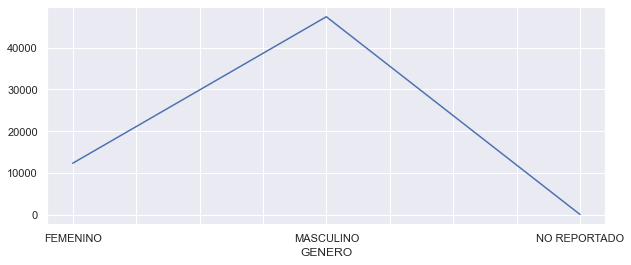

In [550]:
sbn.set(rc={'figure.figsize':(10, 4)})
homicidios_df.groupby([homicidios_df['GENERO']])['CANTIDAD'].count().plot()
                        

In [585]:
homicidios_df.groupby([homicidios_df['GENERO']])['CANTIDAD'].count()

GENERO
FEMENINO        12319
MASCULINO       47431
NO REPORTADO       60
Name: CANTIDAD, dtype: int64

<AxesSubplot:xlabel='GRUPO ETARÍO'>

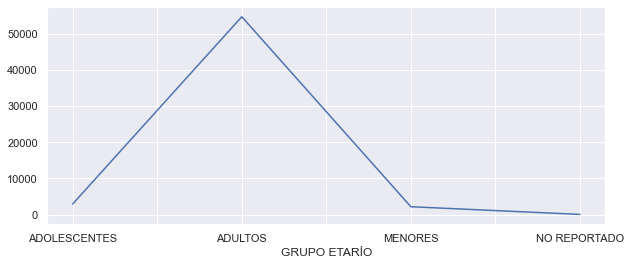

In [551]:
sbn.set(rc={'figure.figsize':(10, 4)})
homicidios_df.groupby([homicidios_df['GRUPO ETARÍO']])['CANTIDAD'].count().plot()

In [586]:
homicidios_df.groupby([homicidios_df['GRUPO ETARÍO']])['CANTIDAD'].count()

GRUPO ETARÍO
ADOLESCENTES     2924
ADULTOS         54671
MENORES          2170
NO REPORTADO       45
Name: CANTIDAD, dtype: int64

In [552]:
#Crear listas 
años=(pd.array(last5_df["FECHA HECHO"].dt.year)).tolist()
generos=(pd.array(last5_df["GENERO"])).tolist()
grupo=(pd.array(last5_df["GRUPO ETARÍO"])).tolist()
dpto=(pd.array(last5_df["DEPARTAMENTO"])).tolist()

In [553]:
last5_df.groupby([años,generos])['CANTIDAD'].count()

2017  FEMENINO        1004
      MASCULINO       3839
      NO REPORTADO       1
2018  FEMENINO        1189
      MASCULINO       4327
      NO REPORTADO      16
2019  FEMENINO        1131
      MASCULINO       4417
      NO REPORTADO      13
2020  FEMENINO         850
      MASCULINO       3830
      NO REPORTADO       4
2021  FEMENINO        1198
      MASCULINO       5120
      NO REPORTADO       5
2022  FEMENINO         426
      MASCULINO       1647
      NO REPORTADO       3
Name: CANTIDAD, dtype: int64

In [554]:
last5_df.groupby([años,grupo])['CANTIDAD'].count()

2017  ADOLESCENTES     267
      ADULTOS         4407
      MENORES          169
      NO REPORTADO       1
2018  ADOLESCENTES     281
      ADULTOS         5063
      MENORES          172
      NO REPORTADO      16
2019  ADOLESCENTES     244
      ADULTOS         5150
      MENORES          154
      NO REPORTADO      13
2020  ADOLESCENTES     228
      ADULTOS         4357
      MENORES           95
      NO REPORTADO       4
2021  ADOLESCENTES     281
      ADULTOS         5881
      MENORES          156
      NO REPORTADO       5
2022  ADOLESCENTES      82
      ADULTOS         1932
      MENORES           59
      NO REPORTADO       3
Name: CANTIDAD, dtype: int64

D. ¿Se evidencia alguna tendencia para cometer dicho delito en algún
mes particular del año?

<AxesSubplot:xlabel='MES DEL AÑO'>

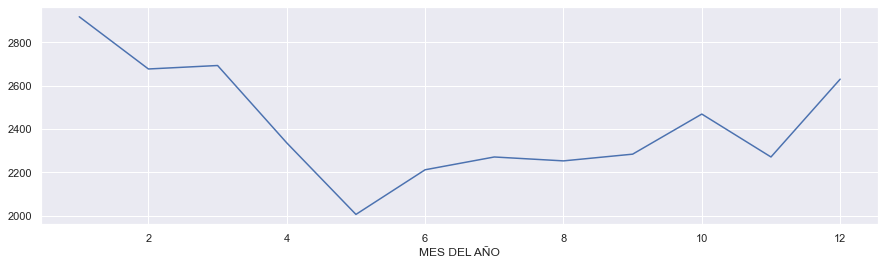

In [555]:
sbn.set(rc={'figure.figsize':(15, 4)})
last5_df.groupby(last5_df["FECHA HECHO"].dt.month)['CANTIDAD'].count().plot(xlabel="MES DEL AÑO")
#En los ultimos 5 años el mes con más delitos fue enero

In [587]:
last5_df.groupby(last5_df["FECHA HECHO"].dt.month)['CANTIDAD'].count()

FECHA HECHO
1     2918
2     2677
3     2693
4     2336
5     2006
6     2212
7     2271
8     2253
9     2284
10    2469
11    2271
12    2630
Name: CANTIDAD, dtype: int64

E. Para los casos en los que se disponga del detalle del delito o de una
descripción, como por ejemplo en delitos sexuales y secuestro, ¿cuáles
son las descripciones o modalidades más comunes?

In [556]:
homicidios_df['DESCRIPCIÓN CONDUCTA'].value_counts()
#El detalle de delito más comun fue EN ACCIDENTE DE TRÁNSITO

ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE DE TRÁNSITO)        59800
ARTÍCULO 110. HOMICIDIO CULPOSO ( CIRCUNSTANCIAS DE AGRAVACIÓN)       10
Name: DESCRIPCIÓN CONDUCTA, dtype: int64

3. A partir de alguno de los conjuntos de datos seleccionados, visualice una
serie de tiempo por año y mes que permita comparar la cantidad de delitos
cometidos para los departamentos con mayor ocurrencia durante los últimos 5
años.

In [557]:
poblacion_df=pd.read_csv("2018.csv")

In [558]:
poblacion_df

,DPNOM,DPMP,MPIO,AÑO,ÁREA GEOGRÁFICA,Total
0,Antioquia,5001,Medellín,2018,Total,2.427.129
1,Antioquia,5002,Abejorral,2018,Total,20.367
2,Antioquia,5004,Abriaquí,2018,Total,2.695
3,Antioquia,5021,Alejandría,2018,Total,4.657
4,Antioquia,5030,Amagá,2018,Total,30.227
...,...,...,...,...,...,...
1117,Vaupés,97889,Yavaraté (CD),2018,Total,1.048
1118,Vichada,99001,Puerto Carreño,2018,Total,20.936
1119,Vichada,99524,La Primavera,2018,Total,10.122
1120,Vichada,99624,Santa Rosalía,2018,Total,4.059


In [560]:
last5_df.head()

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARÍO,DESCRIPCIÓN CONDUCTA,CANTIDAD
30790,ANTIOQUIA,BELLO,5088,BICICLETA,2017-01-01,FEMENINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
30791,ANTIOQUIA,JARDIN,5364,MOTO,2017-01-01,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
30792,BOLIVAR,MOMPÓS,13468,MOTO,2017-01-01,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
30793,CAQUETÁ,ALBANIA,18029,MOTO,2017-01-01,MASCULINO,ADOLESCENTES,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
30794,CAUCA,VILLA RICA,19845,MOTO,2017-01-01,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1


In [561]:
total= []
for x in range (0,len(last5_df)):
    for y in range (0,len(poblacion_df)):
        if last5_df['CODIGO DANE'].values[x]==poblacion_df['DPMP'][y]:
            total.append(poblacion_df["Total"][y])


In [562]:
total

['522.264',
 '14.518',
 '44.442',
 '4.675',
 '20.693',
 '21.611',
 '14.866',
 '113.909',
 '188.014',
 '17.890',
 '357.392',
 '499.192',
 '499.192',
 '56.398',
 '49.633',
 '2.227.642',
 '48.443',
 '48.443',
 '2.427.129',
 '26.964',
 '22.688',
 '490.075',
 '113.909',
 '21.935',
 '357.392',
 '26.279',
 '19.631',
 '295.208',
 '22.871',
 '349.294',
 '91.825',
 '7.412.566',
 '2.427.129',
 '23.848',
 '23.848',
 '110.445',
 '37.399',
 '36.773',
 '2.227.642',
 '318.059',
 '318.059',
 '133.270',
 '6.729',
 '467.269',
 '70.494',
 '529.635',
 '37.770',
 '48.443',
 '17.928',
 '7.412.566',
 '660.179',
 '2.227.642',
 '15.444',
 '27.074',
 '2.427.129',
 '2.427.129',
 '124.552',
 '17.187',
 '21.799',
 '13.784',
 '32.940',
 '529.635',
 '127.545',
 '2.427.129',
 '42.014',
 '107.636',
 '170.582',
 '72.783',
 '32.940',
 '64.645',
 '973.045',
 '7.412.566',
 '15.453',
 '15.453',
 '499.192',
 '22.813',
 '14.835',
 '31.360',
 '109.621',
 '93.154',
 '118.273',
 '308.188',
 '2.227.642',
 '2.427.129',
 '41.542',


In [565]:
def pop_str_to_float(x):
    x = x.replace('.', '')             # Removing euro symbol
    return int(x)

last5_df['POBLACION'] = last5_df['POBLACION'].apply(pop_str_to_float)

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_4020\962515931.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last5_df['POBLACION'] = last5_df['POBLACION'].apply(pop_str_to_float)


In [564]:
last5_df["POBLACION"]=total

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_4020\1983831821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last5_df["POBLACION"]=total


In [567]:
homicidios_df["POBLACION"]=total

ValueError: Length of values (29020) does not match length of index (59810)

In [569]:
last5_df["DELITOSxCAPITA"]=last5_df["CANTIDAD"]/last5_df["POBLACION"]

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_4020\2846068274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last5_df["DELITOSxCAPITA"]=last5_df["CANTIDAD"]/last5_df["POBLACION"]


In [570]:
temp_df=last5_df.groupby(['DEPARTAMENTO'])[['CANTIDAD']].sum().sort_values(by="CANTIDAD", ascending= False).head(3)

In [571]:
temp_df=temp_df.index.values.tolist()
temp_df

['ANTIOQUIA', 'VALLE DEL CAUCA', 'BOGOTA D.C.']

In [572]:
#CREA MI DF DE TOP 3
top3_df=last5_df.loc[(last5_df["DEPARTAMENTO"] == temp_df[0])|(last5_df["DEPARTAMENTO"]==temp_df[1])|(last5_df["DEPARTAMENTO"] == temp_df[2])]

In [409]:
def pop_str_to_float(x):
    x = x.replace('.', '')             # Removing euro symbol
    return float(x)

last5_df['POBLACION'] = last5_df['POBLACION'].apply(pop_str_to_float)
#fifa_df['Wage'] = fifa_df['Wage'].apply(money_str_to_float)

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_4020\3558575396.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last5_df['POBLACION'] = last5_df['POBLACION'].apply(pop_str_to_float)


In [573]:
top3_df

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARÍO,DESCRIPCIÓN CONDUCTA,CANTIDAD,POBLACION,DELITOSxCAPITA
30790,ANTIOQUIA,BELLO,5088,BICICLETA,2017-01-01,FEMENINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1,522264,1.914740e-06
30791,ANTIOQUIA,JARDIN,5364,MOTO,2017-01-01,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1,14518,6.888001e-05
30805,VALLE DEL CAUCA,CALI,76001,MOTO,2017-01-01,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,2,2227642,8.978103e-07
30806,VALLE DEL CAUCA,DAGUA,76233,MOTO,2017-01-01,MASCULINO,ADOLESCENTES,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1,48443,2.064282e-05
30807,VALLE DEL CAUCA,DAGUA,76233,MOTO,2017-01-01,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1,48443,2.064282e-05
...,...,...,...,...,...,...,...,...,...,...,...
59805,VALLE DEL CAUCA,RIOFRÍO,76616,NO REPORTADO,2022-04-16,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1,15554,6.429214e-05
59806,VALLE DEL CAUCA,TORO,76823,NO REPORTADO,2022-02-20,FEMENINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1,14612,6.843690e-05
59807,VALLE DEL CAUCA,TORO,76823,NO REPORTADO,2022-02-20,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,4,14612,2.737476e-04
59808,VALLE DEL CAUCA,TULUÁ,76834,NO REPORTADO,2022-04-16,FEMENINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1,212685,4.701789e-06


In [576]:
dpto=(pd.array(top3_df["DEPARTAMENTO"])).tolist()
año=(pd.array(top3_df["FECHA HECHO"].dt.year)).tolist()
mes=(pd.array(top3_df["FECHA HECHO"].dt.month)).tolist()
delitos=(pd.array(top3_df["DELITOSxCAPITA"])).tolist()

In [577]:
top3_df.groupby([año,dpto])['DELITOSxCAPITA'].sum()

2017  ANTIOQUIA          0.015800
      BOGOTA D.C.        0.000065
      VALLE DEL CAUCA    0.009058
2018  ANTIOQUIA          0.016072
      BOGOTA D.C.        0.000069
      VALLE DEL CAUCA    0.010566
2019  ANTIOQUIA          0.016322
      BOGOTA D.C.        0.000069
      VALLE DEL CAUCA    0.010827
2020  ANTIOQUIA          0.014847
      BOGOTA D.C.        0.000054
      VALLE DEL CAUCA    0.005980
2021  ANTIOQUIA          0.025748
      BOGOTA D.C.        0.000067
      VALLE DEL CAUCA    0.009420
2022  ANTIOQUIA          0.007383
      BOGOTA D.C.        0.000024
      VALLE DEL CAUCA    0.002463
Name: DELITOSxCAPITA, dtype: float64

<AxesSubplot:title={'center':'DELITOS POR AÑO'}>

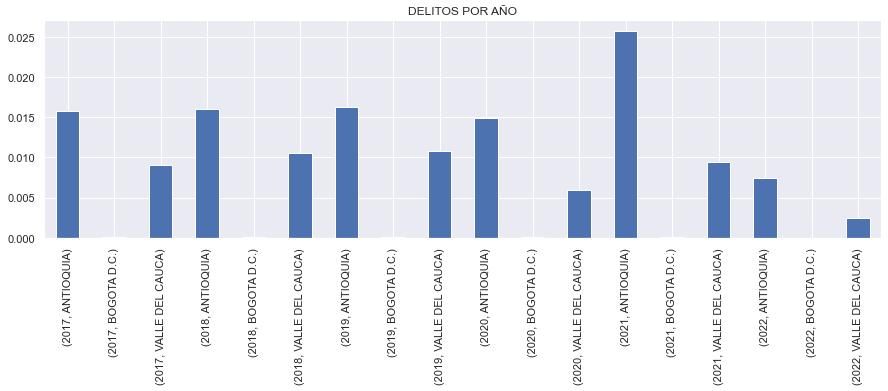

In [578]:
sbn.set(rc={'figure.figsize':(15, 4)})
top3_df.groupby([año,dpto])['DELITOSxCAPITA'].sum().plot(kind="bar",stacked=True,rot=90,title='DELITOS POR AÑO')

<AxesSubplot:title={'center':'DELITOS POR MES'}>

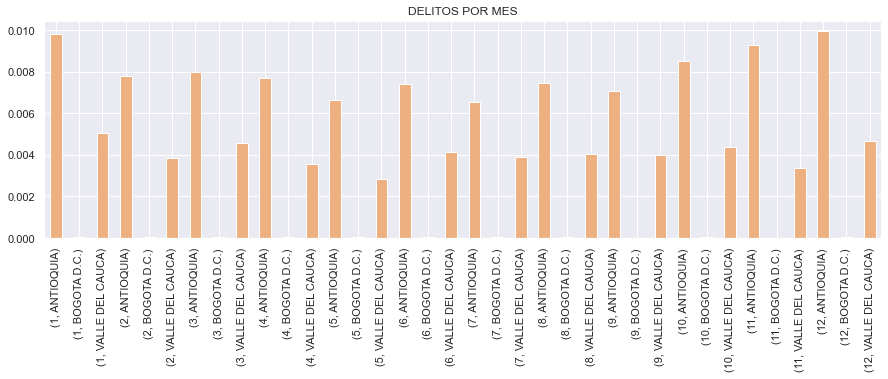

In [584]:
sbn.set(rc={'figure.figsize':(15, 4)})
top3_df.groupby([mes,dpto])['DELITOSxCAPITA'].sum().plot(kind="bar",stacked=True,rot=90,title='DELITOS POR MES',cmap='flare')

In [581]:
last5_df.to_csv('Homicidio_BK.csv')